### Follow These Instructions

Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.

# Assignment 3: Classification with Logistic Regression  [ __ /100  marks]


In this assignment we will use the `diabetes` dataset, which was collected and made available by “National Institute of Diabetes and Digestive and Kidney Diseases” as part of the Pima Indians Diabetes Database. 

We will use logistic regression to predict whether subjects have diabetes or not.

## Global Toolbox

In [27]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
seed=0

## Question 1.1 [ _ /3 marks]

Read the file `diabetes.csv` into a pandas DataFrame. Display the first 5 rows of the DataFrame. 

In [28]:
# ****** your code here ******
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Question 1.2 [ _ /6 marks]

(1) How many classes are there? How many features are available to predict the outcome?

**Your answer**: 2 classes. 8 features.

(2) Is the dataset class-balanced?

In [29]:
# ****** your code here ******
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

**Your answer**: No

(3) For this classification problem, what is the baseline accuracy and how would you interpret it? Round into 3 decimal place.

In [30]:
# ****** your code here ******
counts= df.Outcome.value_counts()
baseline_accuracy = round(counts[0]/(counts[0]+counts[1]), 3)
print("Baseline Accuracy is:", baseline_accuracy)

# a trained ML model should do better than 65.1%, otherwise useless.

Baseline Accuracy is: 0.651


## Question 1.3 [ _ /3 marks]

Use `train_test_split` with `random_state=0` to split the data into training and test sets. Leave `20%` for testing.

In [31]:
# Store all the features into variable "X"
# ****** your code here ******
#X = df.iloc[:,0:8].values
X = df.drop("Outcome", axis='columns').values

# Store the output class values into variable "y" 
# ****** your code here ******
y = df.Outcome.values

# Split your X and y data using train_test_split 
# ****** your code here ******
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=seed)

## Question 2.1 [ _ /3 marks]

We will use sklearn's `LogisticRegression` to solve the classification problem. Before we move on, answer the following questions by reading the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).


(1) Does `LogisticRegression` use a penalty by default?  If yes, what penalty?

**Your answer**: Yes, it uses L2 penalty by default.


    
(2) If we apply a penalty during learning, what difference do you expect to see in the resulting coefficients (parameters), relative to not applying a penalty during learning?

**Your answer**: We expect the coefficients to be smaller if a penalty is applied.
    
(3) If using the default settings of `LogisticRegression`, do you need to include a column of 1s in your feature/design matrix? Briefly explain why or why not.

**Your answer**: A column of 1s is not needed because by default sklearn estimates an intercept.

## Question 2.2 [ _ /10 marks]

Create a `LogisticRegression` model with `penalty=none`. Let's fisrt train and test this classifier using only "Insulin" as the input feature. Make a scatter plot of the points. Plot your prediction on the same graph.

/home/alireza/my_py_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


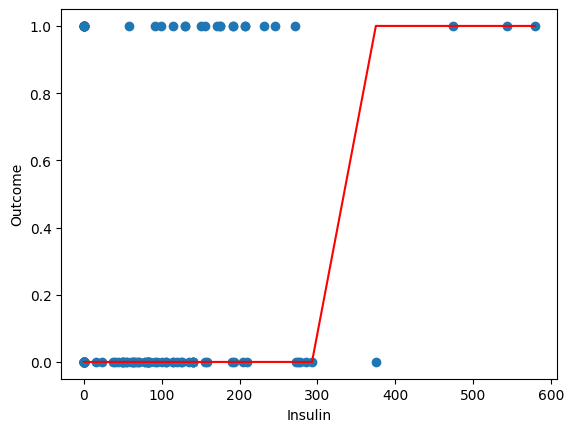

In [32]:
# Create a LogisticRegression model without regularization 
# ****** your code here ******
LR1 = LogisticRegression(penalty="none", max_iter=10000)

# Obtain training data and test data  
# ****** your code here ******
xtrain = Xtrain[:,4].reshape(-1, 1)
xtest = Xtest[:,4].reshape(-1, 1)

# OR
# xtrain = Xtrain[:,[4]]
# xtest = Xtest[:,[4]]

# Fit to your training data using Logistic Regression 
# ****** your code here ******
LR1.fit(xtrain, ytrain)

# Create a scatter plot of the test data. 
# ****** your code here ******
plt.scatter(xtest, ytest)
plt.xlabel('Insulin')
plt.ylabel('Outcome')

# Also plot your prediction using sns.lineplot
# lineplot needs 1d vector x
ypred = LR1.predict(xtest)
sns.lineplot(x=xtest.reshape(-1), y=ypred,color="red") 
plt.show()

## Question 2.3 [ _ /10 marks]
Evaluate the classification performance using `Accuracy`, `Recall`, `Precision`, `Sensitivity` and `Specificity`.

In [33]:
# ****** your code here ******
# You can either write a function or not

def compute_performance(yhat, y, classes):
    # First, get tp, tn, fp, fn
    tp = sum(np.logical_and(yhat == classes[1], y == classes[1]))
    tn = sum(np.logical_and(yhat == classes[0], y == classes[0]))
    fp = sum(np.logical_and(yhat == classes[1], y == classes[0]))
    fn = sum(np.logical_and(yhat == classes[0], y == classes[1]))

    print(f"tp: {tp} tn: {tn} fp: {fp} fn: {fn}")
    
    # Accuracy
    acc = (tp + tn) / (tp + tn + fp + fn)
    
    # Precision
    # "Of the ones I labeled +, how many are actually +?"
    precision = tp / (tp + fp)
    
    # Recall
    # "Of all the + in the data, how many do I correctly label?"
    recall = tp / (tp + fn)    
    
    # Sensitivity
    # "Of all the + in the data, how many do I correctly label?"
    sensitivity = recall
    
    # Specificity
    # "Of all the - in the data, how many do I correctly label?"
    specificity = tn / (fp + tn)
    
    # Print results
    
    print("Accuracy:",round(acc,6),"Recall:",round(recall,6),"Precision:",round(precision,6),
          "Sensitivity:",round(sensitivity,6),"Specificity:",round(specificity,6))


compute_performance(ypred, ytest, LR1.classes_)

tp: 3 tn: 106 fp: 1 fn: 44
Accuracy: 0.707792 Recall: 0.06383 Precision: 0.75 Sensitivity: 0.06383 Specificity: 0.990654


## Question 3.1 [ _ /10 marks]

Create another `LogisticRegression` model with `penalty=none`. Train and test this classifier with all features and then evaluate the performance.

In [34]:
# Create a LogisticRegression model without regularization 
# ****** your code here ******
LR2 = LogisticRegression(penalty="none", max_iter=10000)

# Fit to your training data using Logistic Regression 
# ****** your code here ******
LR2.fit(Xtrain, ytrain)

# Compute your test predictions, given test inputs 
# ****** your code here ******
ypred2 = LR2.predict(Xtest)

# Evaluate the performance
# ****** your code here ******
compute_performance(ypred2, ytest, LR2.classes_)

tp: 29 tn: 98 fp: 9 fn: 18
Accuracy: 0.824675 Recall: 0.617021 Precision: 0.763158 Sensitivity: 0.617021 Specificity: 0.915888


/home/alireza/my_py_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


Does using more features help to improve the classification?

**Your answer** : Yes

## Question 3.2 [ _ /10 marks]
Let's adjust the decision threshold from 0.5 (default) to 0.4 and 0.6, and then evlaute the performance.

In [35]:
# Using your classifer from last question, adjust the decision threshold and get the updated predictions 
# ****** your code here ******
threshold = 0.4
ytest_prob = LR2.predict_proba(Xtest)
ypred_new = LR2.classes_[(ytest_prob[:,1] > threshold).astype(int)]


# Evaluate the performance
# ****** your code here ******
compute_performance(ypred_new, ytest, LR2.classes_)

tp: 34 tn: 88 fp: 19 fn: 13
Accuracy: 0.792208 Recall: 0.723404 Precision: 0.641509 Sensitivity: 0.723404 Specificity: 0.82243


In [36]:
# Using your classifer from last question, adjust the decision threshold and get the updated predictions 
# ****** your code here ******
threshold = 0.6
ytest_prob = LR2.predict_proba(Xtest)
ypred_new = LR2.classes_[(ytest_prob[:,1] > threshold).astype(int)]


# Evaluate the performance
# ****** your code here ******
compute_performance(ypred_new, ytest, LR2.classes_)

tp: 26 tn: 100 fp: 7 fn: 21
Accuracy: 0.818182 Recall: 0.553191 Precision: 0.787879 Sensitivity: 0.553191 Specificity: 0.934579


What do you think is a better threshold? 

**Your answer**: To be determined in accordance with context and requirements of the project. This may involve consulting the project stakeholders. For example, depending on the project appetite for Recall, the model with highest accuracy meeting that appetite could be a good choice.

## Question 3.3 [ _ /10 marks]

Create a final `LogisticRegression` model with `penalty=l2`, `C=0.01`. Train and test this classifier with all features and then evaluate the performance.

In [37]:
# Create a LogisticRegression model with l2 regularization 
# ****** your code here ******
LR3 = LogisticRegression(penalty="l2", solver='lbfgs', multi_class='ovr', C=0.01, max_iter=10000)

# Fit to your training data using Logistic Regression 
# ****** your code here ******
LR3.fit(Xtrain, ytrain)

# Compute your test predictions, given test inputs 
# ****** your code here ******
ypred3 = LR3.predict(Xtest)

# Evaluate the performance
# ****** your code here ******
compute_performance(ypred3, ytest, LR3.classes_)

tp: 28 tn: 97 fp: 10 fn: 19
Accuracy: 0.811688 Recall: 0.595745 Precision: 0.736842 Sensitivity: 0.595745 Specificity: 0.906542


Does regularization help to improve the classification?

**Your answer** : No

## Question 4 [ _ /15 marks]

Plot ROC Curves for the classifiers you used in questions 2.2, 3.1, and 3.3. Use AUC to determine which classifier is the best.

AUC Q2.2 Model: 0.536| AUC Q3.1 Model: 0.867| AUC Q3.3 Model: 0.853


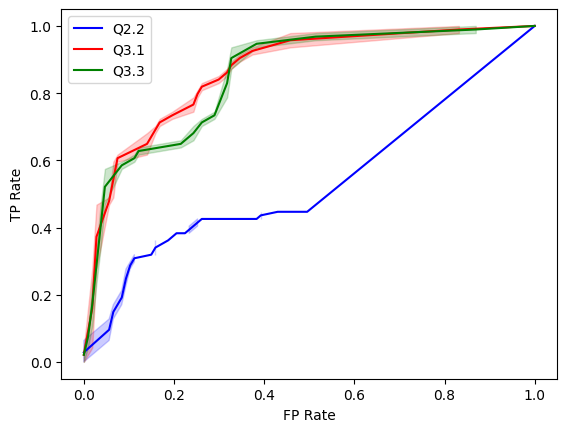

In [38]:
# Use roc_curve to get FPR and TPR for each of the 3 classifiers 
# ****** your code here ******
fpr1, tpr1, _ = roc_curve(ytest, LR1.predict_proba(xtest)[:,1], pos_label=1)
fpr2, tpr2, _ = roc_curve(ytest, LR2.predict_proba(Xtest)[:,1], pos_label=1)
fpr3, tpr3, _ = roc_curve(ytest, LR3.predict_proba(Xtest)[:,1], pos_label=1)

# Plot all of the ROC curves 
# ****** your code here ******
ax = sns.lineplot(x=fpr1, y=tpr1, color="blue",  label='Q2.2')
ax = sns.lineplot(x=fpr2, y=tpr2, color="red",   label='Q3.1')
ax = sns.lineplot(x=fpr3, y=tpr3, color="green", label='Q3.3')
ax.set_xlabel("FP Rate")
ax.set_ylabel("TP Rate")

# Determine AUC for each of the ROC curves 
# ****** your code here ******
print(f"AUC Q2.2 Model: {auc(fpr1, tpr1).round(3)}| AUC Q3.1 Model: {auc(fpr2, tpr2).round(3)}| AUC Q3.3 Model: {auc(fpr3, tpr3).round(3)}")

Which one is the best classifier?

**Your answer**: The LR classifier using all input features and with no regularization.

## Question 5 [ _ /10 marks]

Multiclass Logistic Regression

In the classification lab, we trained a binary LR classifier using the _mnist_ dataset to discriminate entries which were equal to 5 from the rest. Use the same dataset to train a multiclass **Logistic Regression** using the [SGDClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)  with `l2` regularization. So, this time you will have 10 classes, *i.e.*, 0, 1, 2, 3, 4, 5, 6, 7, 8, and 9. For training use `max_iter=2000`, `tol=1e-3`, `random_state=seed`. For some `sklearn` functions you can set argument `n_jobs=N` to run them in parallel and speed up computations. A good value for N can be the number of physical CPU cores that your machine possesses (`N=-1` would use all cores). Check the documentations of the functions to take advantage from this where possible.

First load the data and plot a histogram to comment on class distribution qualitatively. For splitting the data into train and test sets, use `test_size=0.5` and `random_state=seed`. What is the balanced accuracy score of your model?

In [39]:
# We will be using the MNIST dataset, which is a set of 70000 small images of handwritten digits.
# Each image is labeled with the digit it represents.
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')

In [40]:
x_mnist = mnist["data"]
y_mnist = mnist["target"].astype(np.uint8)

Classes: [0 1 2 3 4 5 6 7 8 9]
Class count: [6903 7877 6990 7141 6824 6313 6876 7293 6825 6958]


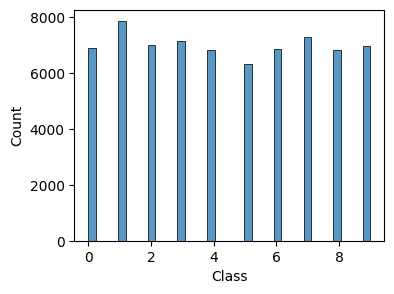

In [41]:
c, n = np.unique(y_mnist, return_counts=True)
print('Classes:', c)
print('Class count:',n)

fig, ax = plt.subplots(figsize=(4, 3))
sns.histplot(y_mnist).plot(ax=ax)
plt.xlabel('Class')
plt.show()

**Your answer**:
According to the histogram, it is safe to say we have balanced class distribution.

In [42]:
X_train, X_test, y_train, y_test = train_test_split(x_mnist, y_mnist, test_size=0.5, random_state=seed)

After reading the `SGDClassifier` documentation you realize the following argument settings:

`loss='hinge'`    --> gives support-vector machine

`loss='log_loss'` --> gives logistic regression

In [45]:
clf1 = SGDClassifier(loss='log_loss', penalty="l2", max_iter=2000, tol=1e-3, n_jobs=-1, random_state=seed).fit(X_train, y_train)

from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, clf1.predict(X_test)).round(2)

0.89

## Question 6 [ _ /10 marks]

Run the cell below to see how well your model can recognize a digit drawn by the mouse cursor. Set the variable `final_model`, run the cell, draw on the pop-up canvas, and once you close the canvas you will see the model's recognition of your input.

Despite the cell using your classifier, which has a high balanced accuracy score, it often makes mistakes and its performance seems questionable. Try to explain in words why is that so?

Caveat: The cell below will not run on headless servers, you will need to use a local installation of python. You might have some fun until you can get it to work, but that's ok, because I want you to try your hands on technicalities and not always rely on online services.

Your input:


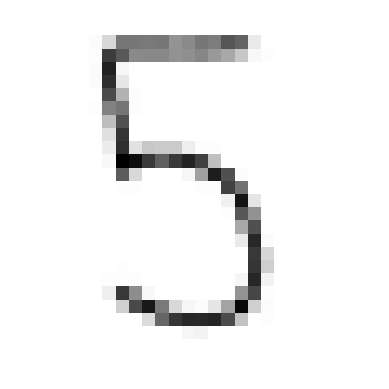

Input recognized as 6.


In [44]:
final_model = clf1 # use the name of your final model
#!pip install tk-tools
from tkinter import *
import tkinter as tk
from PIL import Image
import io
import matplotlib as mpl

temp_file_name="TEMP_image_TEMP.jpg"

app = Tk()
app.geometry("300x300")

canvas = tk.Canvas(app, bg='white')
canvas.pack(anchor='nw', fill='both', expand=1)

def get_x_and_y(event):
    global lasx, lasy
    lasx, lasy = event.x, event.y

def draw_smth(event):
    global lasx, lasy
    canvas.create_line((lasx, lasy, event.x, event.y), fill='red', width=3.5)
    lasx, lasy = event.x, event.y
    ps = canvas.postscript(colormode = 'color')
    img = Image.open(io.BytesIO(ps.encode('utf-8')))
    img.save(temp_file_name)

canvas.bind("<Button-1>", get_x_and_y)
canvas.bind("<B1-Motion>", draw_smth)

app.mainloop()

img = Image.open(temp_file_name)
#resize image to 28x28 pixels
img = img.resize((28,28))
#convert rgb to grayscale
img = img.convert("L")
img = np.array(img)
img = 255.0 - img
print("Your input:")
plt.imshow(img, cmap = mpl.cm.binary); plt.axis("off")
plt.show()

# reshaping to support our model input
img = np.reshape(img, 28*28)
#predicting the class
print('Input recognized as ' + str(final_model.predict([img])[0])+'.')

**Your answer**: The training data was not true representative of the population that the model is seeing in production (smooth handwritten vs pixelated mouse drawn). There are more reasons though. I will explain in the class. 